**Analysis and Visualization of Diwali Sales Data**

This project involves analyzing Diwali sales data to understand consumer behavior during the festival. Our goal is to evaluate sales trends and draw meaningful conclusions to enhance future marketing strategies. By exploring the dataset, we aim to uncover insights that can inform decision-making for upcoming sales events.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
#load csv file in df variable
df=pd.read_csv('Diwali_Sales_Data.csv', encoding='unicode_escape')
#print df
print(df)

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

**Data Cleaning**

remove null value rows

In [18]:
#find number of rows and column
df.shape

(11251, 15)

In [19]:
#print top 5 rows of table
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [12]:
#print first n rows df.head(n)
df.head(15)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [8]:
#information about csv files
# no of not null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [20]:
#here last 2 column is fully empty so delete last 2 column
#df.drop(['column1','column2',.....])
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [21]:
#column1 => no of null values
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [23]:
#delete null value rows
df.dropna()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# **Gender wise Analysis**

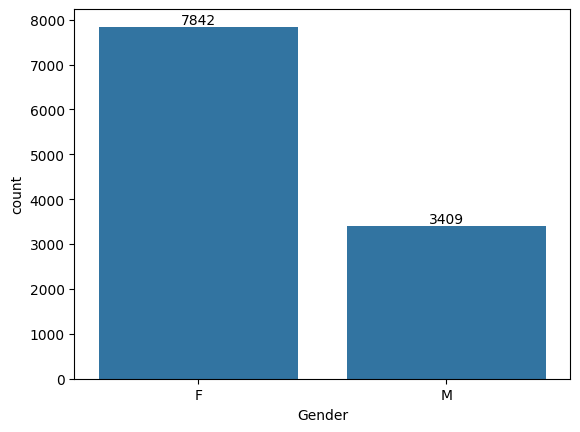

In [53]:

plot1=sns.countplot(x='Gender',data=df)

for x in plot1.containers:
  plot1.bar_label(x)



In [54]:
x = df.groupby(['Gender'])['Amount'].sum().reset_index()


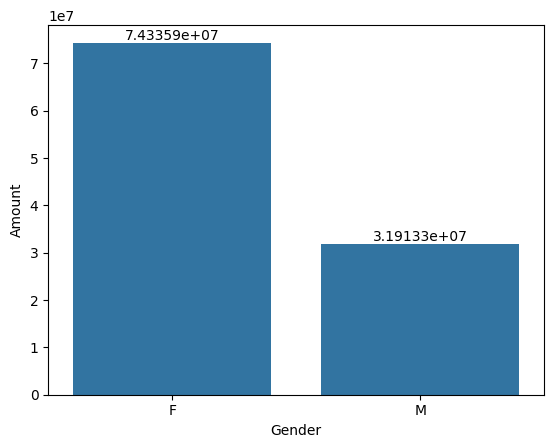

In [55]:
plot2 = sns.barplot(x='Gender', y='Amount', data=x)

for x in plot2.containers:
    plot2.bar_label(x)



---------------------------------------------------------------------------------------------------

**Gender-wise Analysis Conclusion**

*The analysis reveals that a significant majority of customers are female. This trend suggests that marketing strategies targeting female consumers could be more effective, potentially leading to increased sales during the Diwali season.*

---------------------------------------------------------------------------------------------------


# **Age/Age-Group wise Analysis**


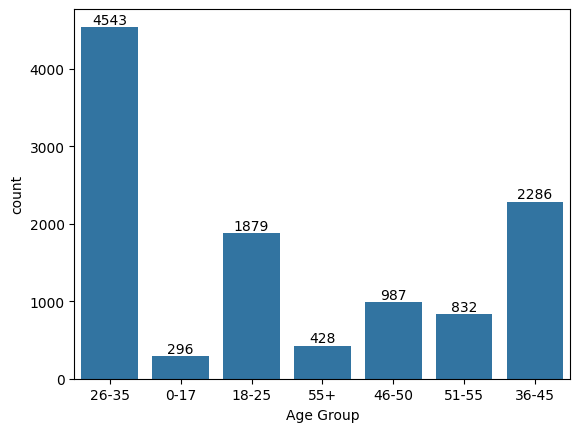

In [56]:
plot3 = sns.countplot(x='Age Group',data=df)

for x in plot3.containers:
  plot3.bar_label(x)

In [64]:
y = df.groupby(['Age Group'])['Amount'].sum().reset_index()

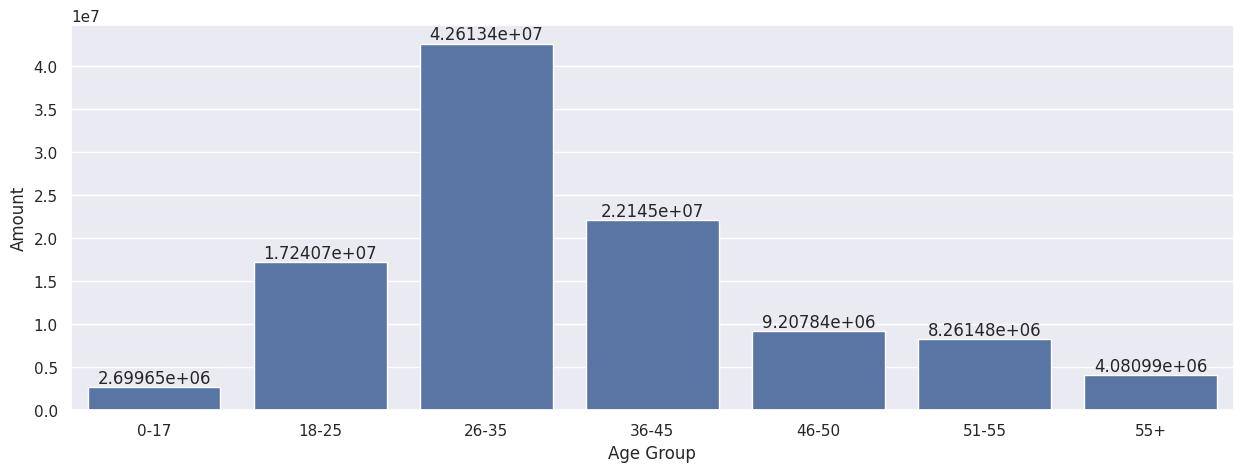

In [75]:
sns.set(rc={'figure.figsize':(15,5)})
plot4 = sns.barplot(x='Age Group', y='Amount', data=y)

for x in plot4.containers:
    plot4.bar_label(x)

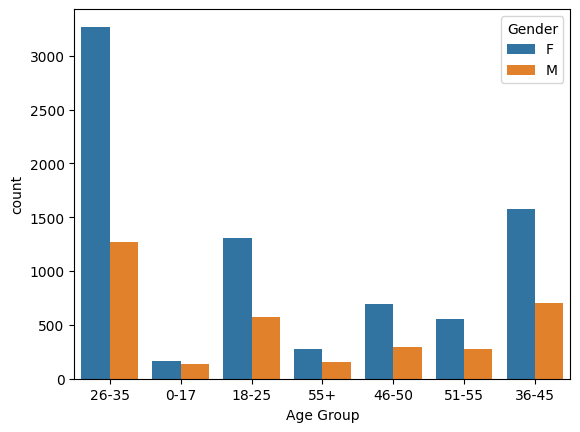

In [59]:
plot5 = sns.countplot(x='Age Group',hue='Gender',data=df)

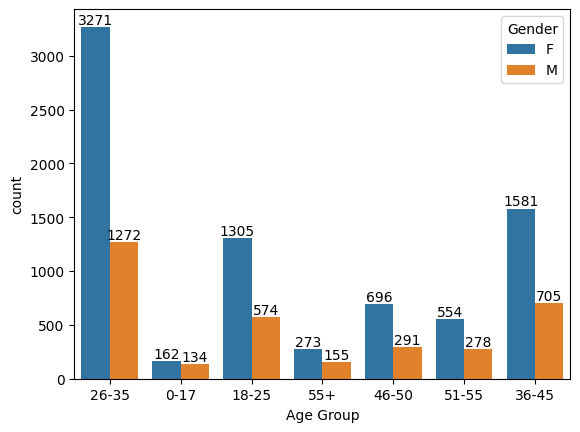

In [62]:
plot5 = sns.countplot(x='Age Group',hue='Gender',data=df)

for x in plot5.containers:
    plot5.bar_label(x)

In [67]:
z = df.groupby(['Age Group','Gender'])['Amount'].sum().reset_index()

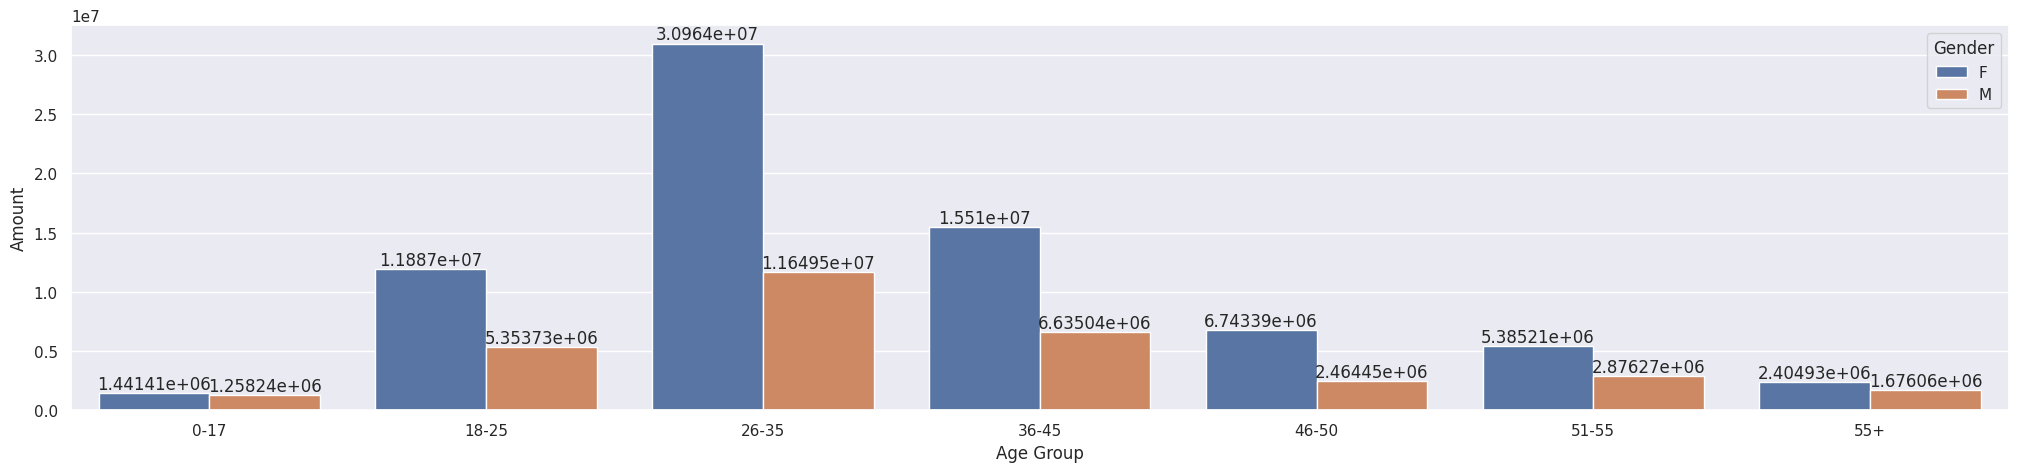

In [78]:
sns.set(rc={'figure.figsize':(25,5)})
plot6 = sns.barplot(x='Age Group', y='Amount', hue='Gender', data=z)

for container in plot6.containers:
    plot6.bar_label(container)

plt.show()

<Axes: xlabel='Age', ylabel='Amount'>

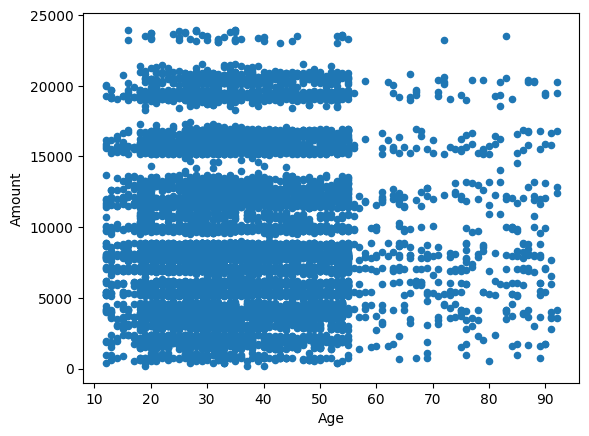

In [71]:
df.plot.scatter('Age', 'Amount')

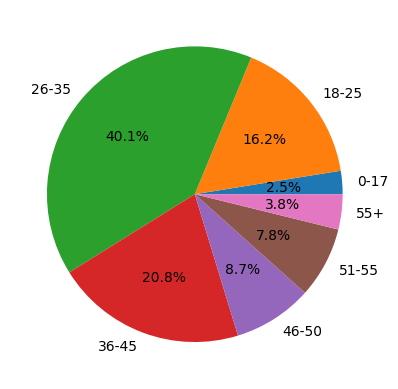

In [73]:
plt.pie(y['Amount'],labels=y['Age Group'],autopct='%1.1f%%')
plt.show()

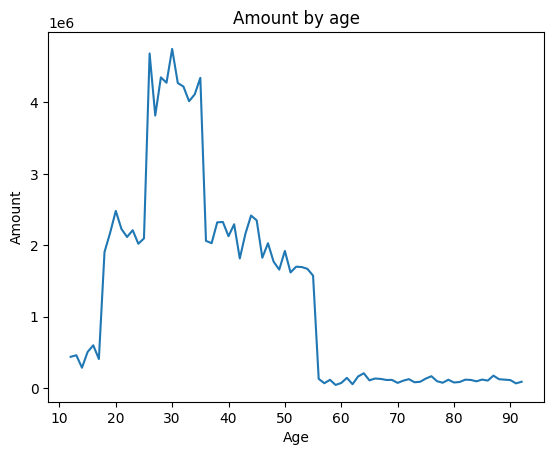

In [74]:
a=df.groupby('Age')['Amount'].sum().reset_index()
sns.lineplot(x='Age',y='Amount',data=a)
plt.title('Amount by age')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()


----------------------------------------------------------------------------------------------------

**Age/Age-Group wise analysis Conclusion**

*The highest percentage of customers falls within the 26-35 age group, indicating that this demographic is the most engaged during Diwali sales. Targeting this age group with tailored marketing campaigns may yield positive results.*

----------------------------------------------------------------------------------------------------

# **State wise analysis**

<Axes: xlabel='State', ylabel='Orders'>

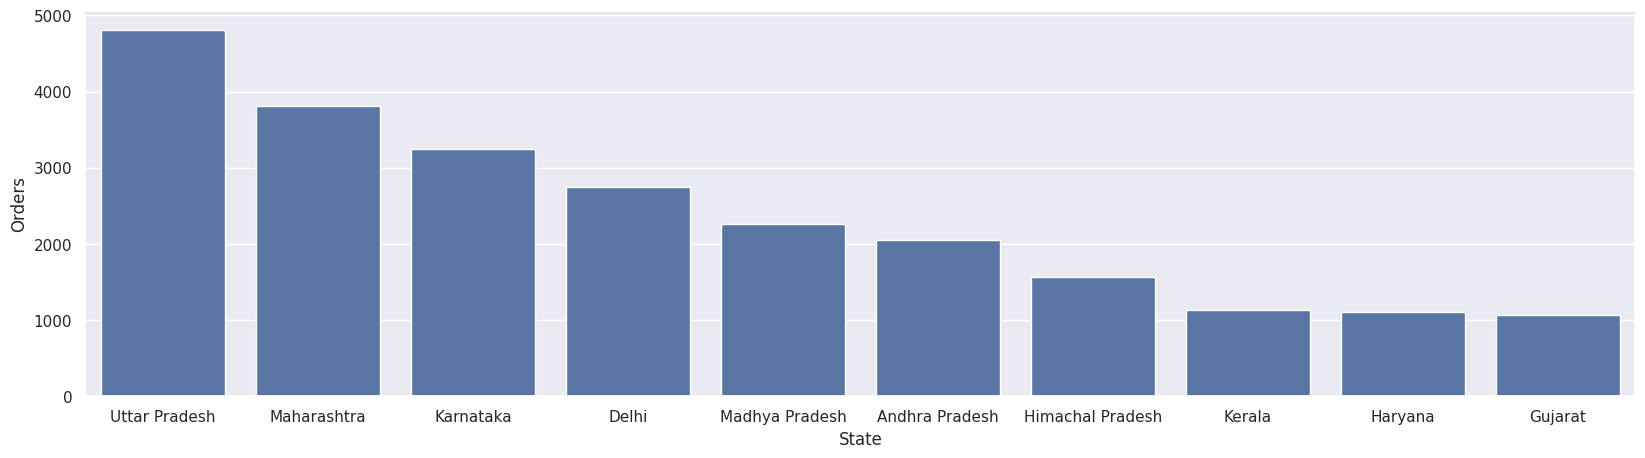

In [97]:
sales_state = df.groupby(['State'])['Orders'].sum().sort_values(ascending=False).head(10).reset_index()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

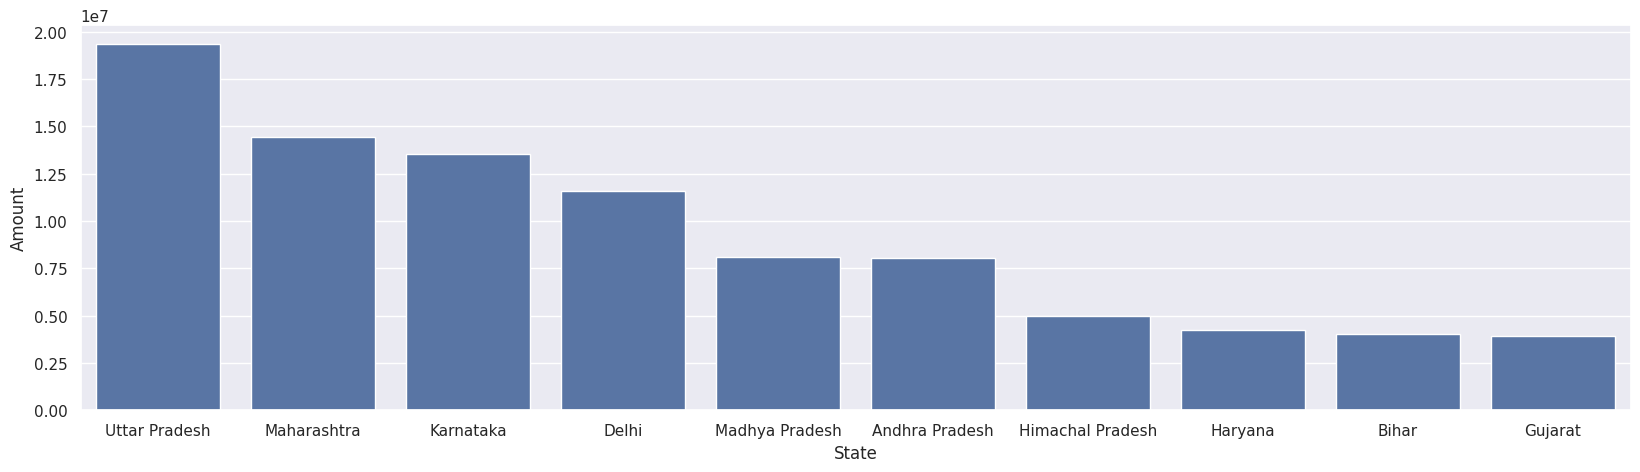

In [84]:
sales_state = df.groupby(['State'])['Amount'].sum().sort_values(ascending=False).head(10).reset_index()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',data=sales_state)

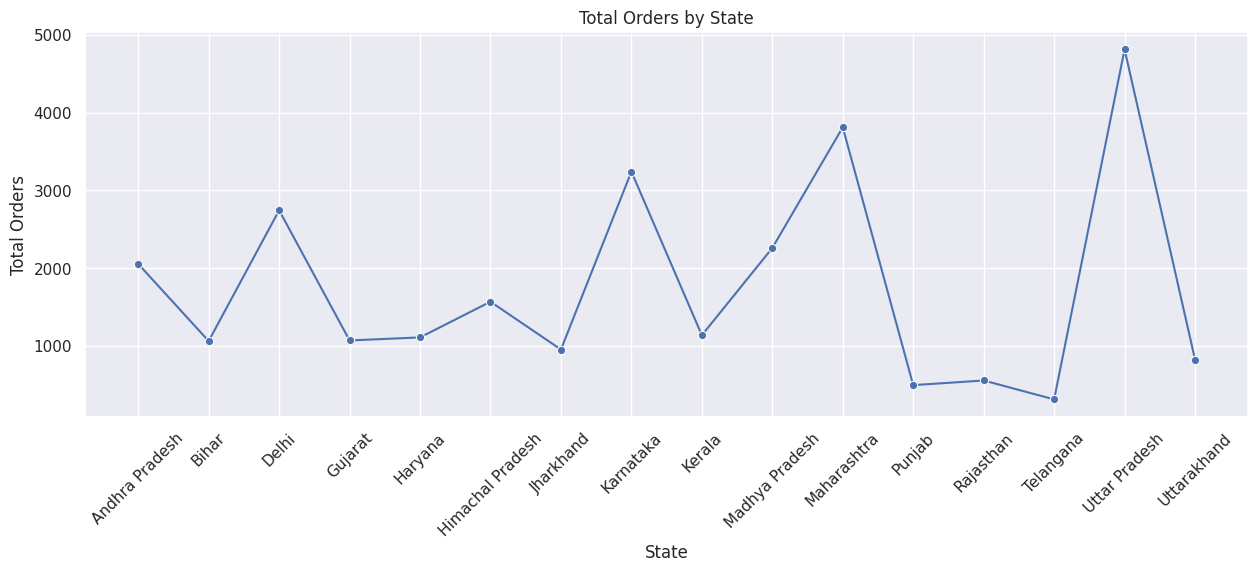

In [95]:
state_sales = df.groupby(['State'])['Orders'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x='State', y='Orders', data=state_sales, marker='o')


plt.title('Total Orders by State')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

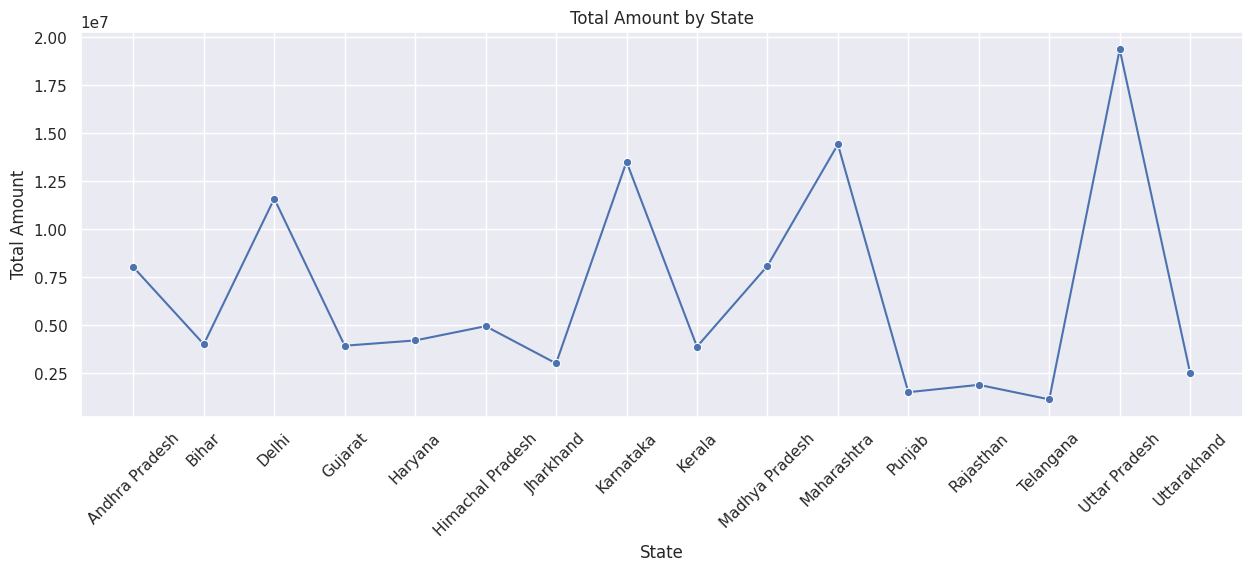

In [101]:
state_amount = df.groupby(['State'])['Amount'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x='State', y='Amount', data=state_amount, marker='o')


plt.title('Total Amount by State')
plt.xlabel('State')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


---------------------------------------------------------------------------------------------------

**State wise analysis Conclusion**

*The analysis reveals that the top states contributing to Diwali sales are Uttar Pradesh, Maharashtra, Karnataka, Delhi, Madhya Pradesh.These regions show significant consumer engagement during the festival.*

---------------------------------------------------------------------------------------------------

# **Product Category wise analysis**

Text(0, 0.5, 'Total Orders')

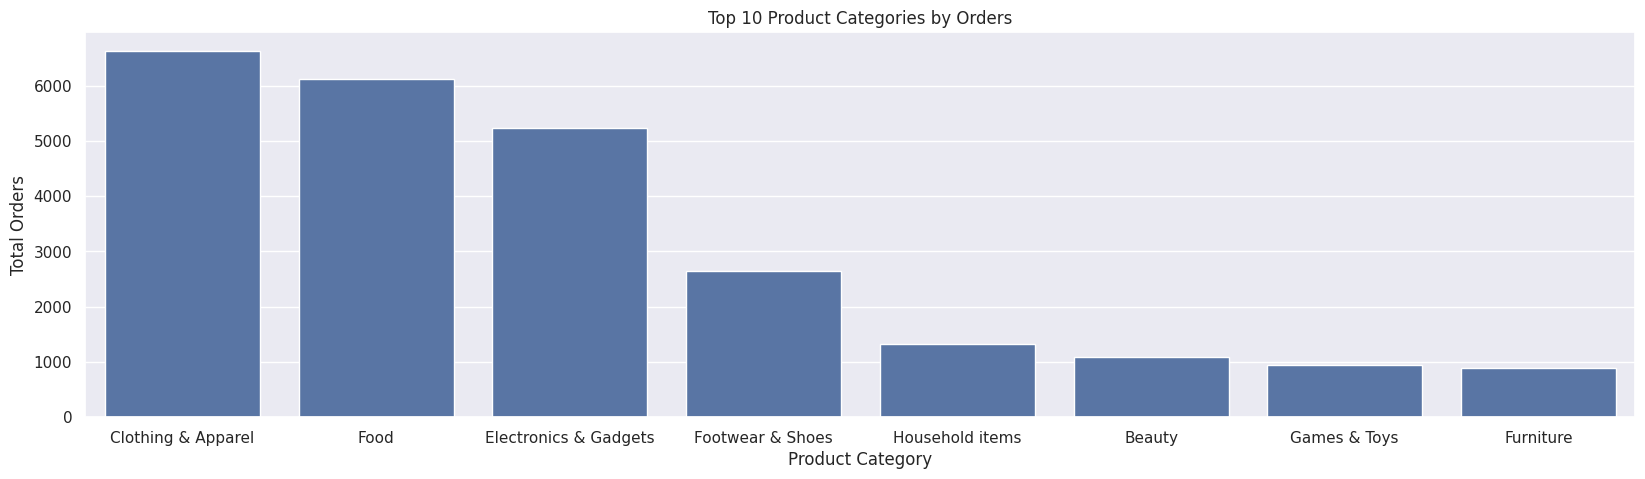

In [88]:
product_category_sales = df.groupby(['Product_Category'])['Orders'].sum().sort_values(ascending=False).head(8).reset_index()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Product_Category', y='Orders', data=product_category_sales)
plt.title('Top 10 Product Categories by Orders')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')

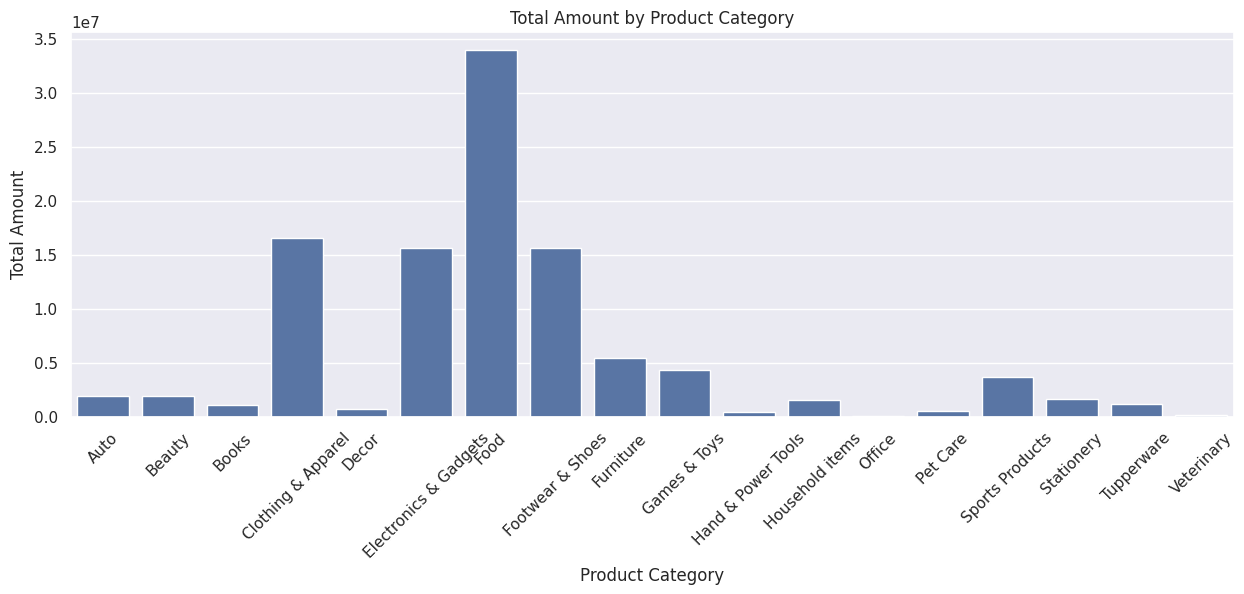

In [102]:
product_category_amount = df.groupby(['Product_Category'])['Amount'].sum().reset_index()

plt.figure(figsize=(15, 5))

sns.barplot(x='Product_Category', y='Amount', data=product_category_amount)

plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)

plt.show()


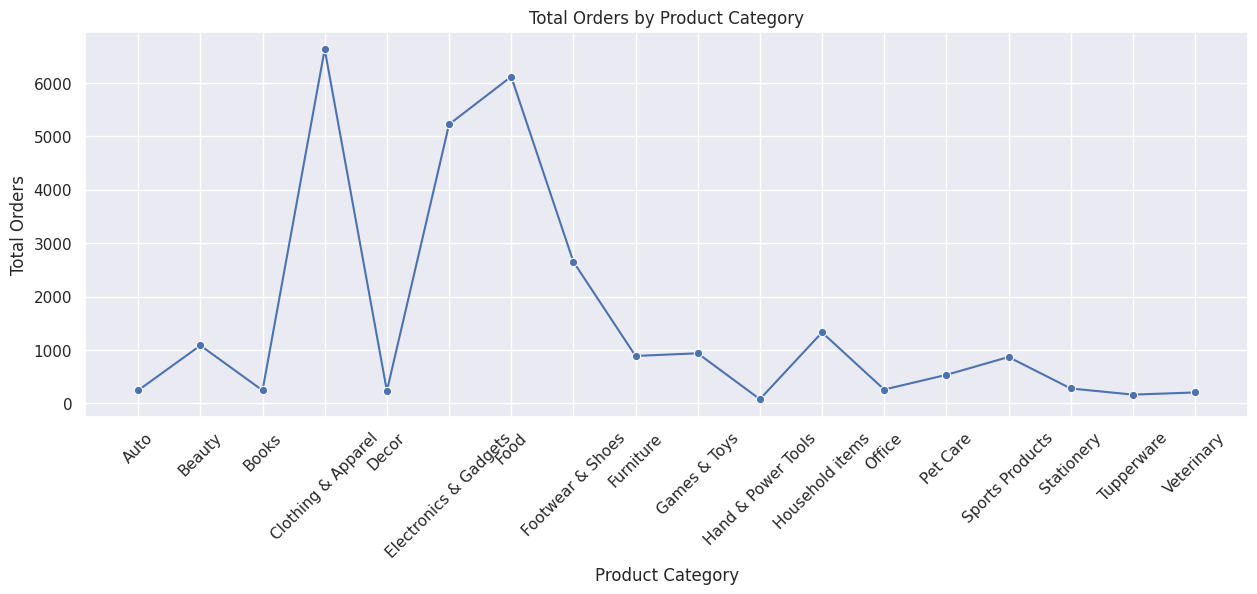

In [89]:
product_category_sales = df.groupby(['Product_Category'])['Orders'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x='Product_Category', y='Orders', data=product_category_sales, marker='o')

plt.title('Total Orders by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

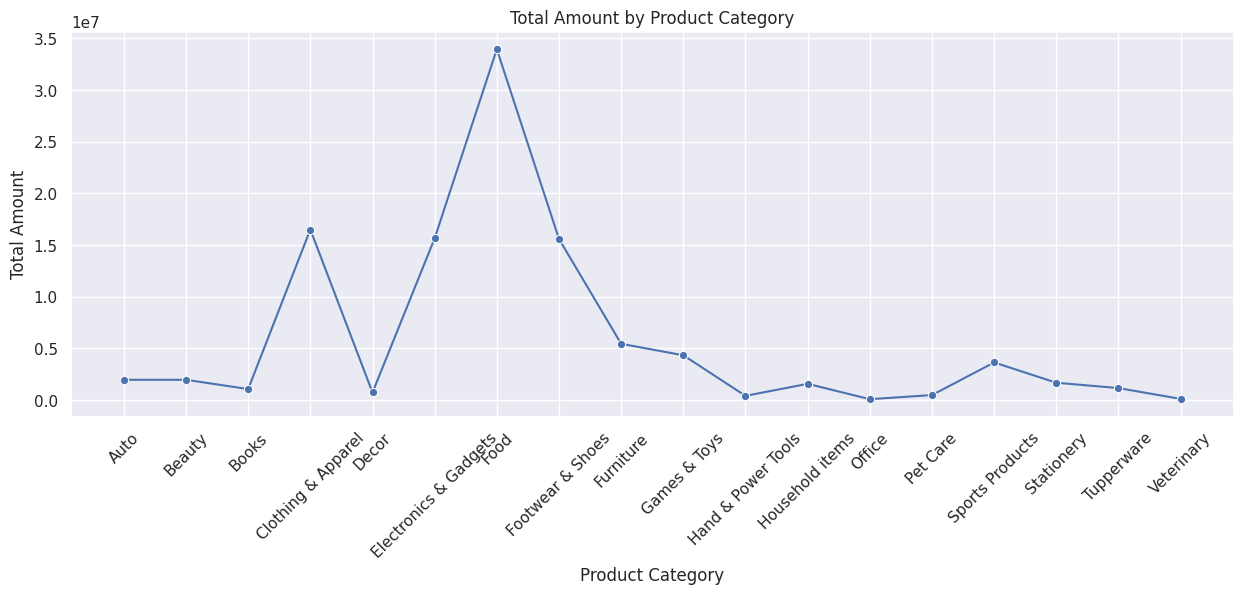

In [103]:
product_category_amount = df.groupby(['Product_Category'])['Amount'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(x='Product_Category', y='Amount', data=product_category_amount, marker='o')

plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


---------------------------------------------------------------------------------------------------

**Product Category-wise Analysis Conclusion**

*The analysis indicates that the top sales during Diwali are driven by the following product categories: clothing and apparel, food, and electronics and gadgets. This trend suggests that consumers prioritize these items during the festive season.*

---------------------------------------------------------------------------------------------------